<a href="https://colab.research.google.com/github/Meenarekha/GEN-AI/blob/main/AI_Job_Interview_Coach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PLAN:

Record audio input (or upload pre-recorded audio).

Use Whisper to transcribe speech.

NLP analysis on:

Speech speed (words/sec)

Count filler words

Answer richness (word count)

Give feedback instantly.

In [ ]:
!pip install -q openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s e

In [ ]:
!pip install -q ffmpeg-python

In [ ]:
!pip install -q nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Please upload your interview answer recording (short mp3 or wav file)...


Saving Mock Interview1.mp3 to Mock Interview1 (1).mp3

Uploaded: Mock Interview1 (1).mp3

Transcribing...


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


⏱️ Transcription done in 236.11 seconds.

🎤 Your Answer Text:
  Hi everybody. So today we're going to be talking about how to approach a mock interview. So whether this is your first mock interview or you're preparing for your real interview, this session is going to give you an insight into what to expect and how to perform your very best. So in this audio, I'll cover why mock interviews are essential and what you should focus on during them and also how you can use them to improve your performance. So mock interviews are really a safe environment where you can practice answering questions and get valuable feedback before your real interview. These interviews can help you become more comfortable with the interview process, improve your communication skills and reduce any interview anxiety. In a mock interview, you'll experience a simulated interview with a coach, a friend, in our case that will be the instructors. So this practice will help you develop better responses, improve your b

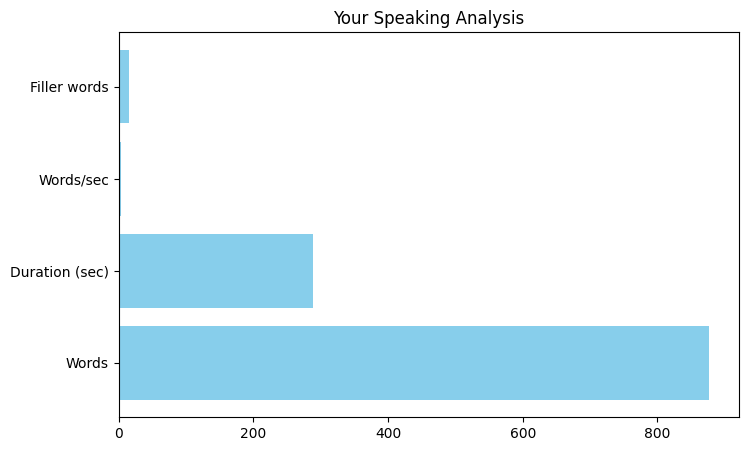

In [ ]:
import whisper
import ffmpeg
import nltk
from nltk.tokenize import word_tokenize
import time
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab') # Download punkt_tab for sentence tokenization

# Load Whisper Model
model = whisper.load_model("small")  # 'small' is faster; you can use 'base' for even faster

# Upload your mock interview audio
from google.colab import files
print("Please upload your interview answer recording (short mp3 or wav file)...")
uploaded = files.upload()

audio_file = list(uploaded.keys())[0]
print(f"\nUploaded: {audio_file}")

# Transcribe audio
print("\nTranscribing...")
start_time = time.time()
result = model.transcribe(audio_file)
end_time = time.time()
print(f"⏱️ Transcription done in {round(end_time - start_time, 2)} seconds.\n")

# Get the text
text = result["text"]
print("🎤 Your Answer Text:\n", text)

# Analyze speaking flaws
tokens = word_tokenize(text.lower())
num_words = len(tokens)

# Estimate audio length
import subprocess
import json

def get_audio_duration(audio_file):
    result = subprocess.run(
        ["ffprobe", "-v", "error", "-show_entries",
         "format=duration", "-of", "json", audio_file],
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE
    )
    duration = json.loads(result.stdout)["format"]["duration"]
    return float(duration)

duration = get_audio_duration(audio_file)
words_per_second = num_words / duration

# Filler words detection
filler_words = ["um", "uh", "like", "you know", "actually", "basically", "so", "hmm"]
filler_count = sum(tokens.count(word) for word in filler_words)

# Short answer detection
too_short = num_words < 30  # Threshold: < 30 words = too short

# Provide Feedback
print("\nReal-time AI Feedback:")

if words_per_second > 3:
    print("- 🐇 You're speaking a bit too fast. Try slowing down slightly.")

if filler_count > 3:
    print(f"- 🚫 Too many filler words detected ({filler_count} times). Try to pause instead of using 'um', 'like'.")

if too_short:
    print(f"- 📚 Your answer is quite short ({num_words} words). Try to elaborate with an example or story.")

if words_per_second <= 3 and filler_count <= 3 and not too_short:
    print("- ✅ Your speaking style looks GOOD! Keep it up!")

# Bonus: simple visualization
labels = ['Words', 'Duration (sec)', 'Words/sec', 'Filler words']
values = [num_words, round(duration,2), round(words_per_second,2), filler_count]

plt.figure(figsize=(8,5))
plt.barh(labels, values, color='skyblue')
plt.title('Your Speaking Analysis')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Please upload your interview answer recording (short mp3 or wav file)...


Saving podcast-interview-background-music-318260.mp3 to podcast-interview-background-music-318260 (3).mp3

Uploaded: podcast-interview-background-music-318260 (3).mp3

Transcribing...


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


⏱️ Transcription done in 82.26 seconds.

🎤 Your Answer Text:
  I'm not sure if you can see this, but I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure. I'm not sure.

Real-time AI Feedback:
- ✅ Your speaking style looks GOOD! Keep it up!


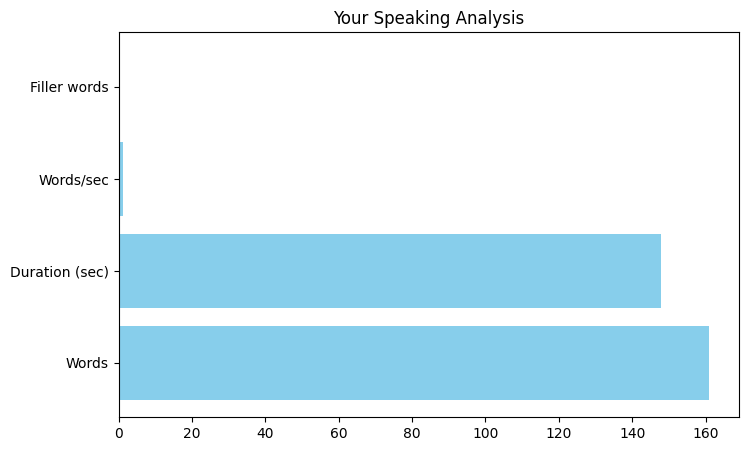

In [ ]:
import whisper
import ffmpeg
import nltk
from nltk.tokenize import word_tokenize
import time
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab') # Download punkt_tab for sentence tokenization

# Load Whisper Model
model = whisper.load_model("small")  # 'small' is faster; you can use 'base' for even faster

# Upload your mock interview audio
from google.colab import files
print("Please upload your interview answer recording (short mp3 or wav file)...")
uploaded = files.upload()

audio_file = list(uploaded.keys())[0]
print(f"\nUploaded: {audio_file}")

# Transcribe audio
print("\nTranscribing...")
start_time = time.time()
result = model.transcribe(audio_file)
end_time = time.time()
print(f"⏱️ Transcription done in {round(end_time - start_time, 2)} seconds.\n")

# Get the text
text = result["text"]
print("🎤 Your Answer Text:\n", text)

# Analyze speaking flaws
tokens = word_tokenize(text.lower())
num_words = len(tokens)

# Estimate audio length
import subprocess
import json

def get_audio_duration(audio_file):
    result = subprocess.run(
        ["ffprobe", "-v", "error", "-show_entries",
         "format=duration", "-of", "json", audio_file],
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE
    )
    duration = json.loads(result.stdout)["format"]["duration"]
    return float(duration)

duration = get_audio_duration(audio_file)
words_per_second = num_words / duration

# Filler words detection
filler_words = ["um", "uh", "like", "you know", "actually", "basically", "so", "hmm"]
filler_count = sum(tokens.count(word) for word in filler_words)

# Short answer detection
too_short = num_words < 30  # Threshold: < 30 words = too short

# Provide Feedback
print("\nReal-time AI Feedback:")

if words_per_second > 3:
    print("- 🐇 You're speaking a bit too fast. Try slowing down slightly.")

if filler_count > 3:
    print(f"- 🚫 Too many filler words detected ({filler_count} times). Try to pause instead of using 'um', 'like'.")

if too_short:
    print(f"- 📚 Your answer is quite short ({num_words} words). Try to elaborate with an example or story.")

if words_per_second <= 3 and filler_count <= 3 and not too_short:
    print("- ✅ Your speaking style looks GOOD! Keep it up!")

# Bonus: simple visualization
labels = ['Words', 'Duration (sec)', 'Words/sec', 'Filler words']
values = [num_words, round(duration,2), round(words_per_second,2), filler_count]

plt.figure(figsize=(8,5))
plt.barh(labels, values, color='skyblue')
plt.title('Your Speaking Analysis')
plt.show()
